In [482]:
import gym
from hiive.mdptoolbox.mdp import ValueIteration, QLearning, PolicyIteration
from hiive.mdptoolbox.example import forest
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import dataframe_image as dfi

In [483]:
def mdp_algorithms(algo, transition, reward,env, discount,plot=False):
    statistics = []
    if env == 'Forest_Management':
        iterations =10000
    else:
        iterations = 10000000
    if algo == 'Value Iteration':
        optimal = ValueIteration(transitions=transition, reward=reward, gamma=discount)
        optimal.setVerbose()
    elif algo == 'Policy Iteration':
        optimal = PolicyIteration(transitions=transition, reward=reward, gamma=discount)
        optimal.setVerbose()
    elif algo == 'Q learning':
        optimal = QLearning(transition, reward, epsilon=0.4, alpha=0.99, gamma=discount, n_iter=iterations)
        optimal.setSilent()
    optimal.run()
    optimal_val = optimal.V
    if algo == 'Q learning':
        optimal_iter = optimal.max_iter
    else:
        optimal_iter = optimal.iter
    optimal_time = optimal.time * 1000  

    iterations = np.zeros(len(optimal.run_stats))
    reward = np.zeros(len(optimal.run_stats))
    time_r = np.zeros(len(optimal.run_stats))
    error = np.zeros(len(optimal.run_stats))
    i = 0
    sum = 0
    if algo == 'Q learning':
        for stat in optimal.run_stats:
            sum += stat['Reward']
            reward[i] = sum
            iterations[i] = stat['Iteration']
            time_r[i] = stat['Time']
            error[i] = stat['Error']
            i += 1
    else:
        for stats in optimal.run_stats:
            iterations[i] = stats['Iteration']
            reward[i] = stats['Reward']
            time_r[i] = stats['Time']
            error[i] = stats['Error']
            i += 1
    if plot == True:
        fig, ax = plt.subplots()
        ax.plot(iterations, reward)
        ax.set(xlabel='Iterations', ylabel='Reward',
               title='Reward VS Iterations'+'('+algo+' for '+ env+')')
        ax.grid()
        fig.savefig(env+"/"+algo+"_reward.png")
        plt.show()
        plt.close()
        fig, ax = plt.subplots()
        ax.plot(iterations, time_r)
        ax.set(xlabel='Iterations', ylabel='Time',
               title='Time VS Iterations'+'('+algo+' for '+ env+')')
        ax.grid()
        fig.savefig(env+"/"+algo+"_time.png")
        plt.show()
        plt.close()
        fig, ax = plt.subplots()
        ax.plot(iterations, error)
        ax.set(xlabel='Iterations', ylabel='Error',
               title='Error VS Iterations'+'('+algo+' for '+ env+')')
        ax.grid()
        fig.savefig(env+"/"+algo+"_error.png")
        plt.show()
        plt.close()
    statistics.append([algo, max(optimal_val), optimal_iter, optimal_time, optimal.policy])
    return statistics

In [484]:
df_value= pd.DataFrame()
for states in [5,50,100,1000]:
    for prob in [0.1,0.5,0.9]:
        for R1 in [4]:
            for R2 in [2]:
                for gamma in [0.1,0.9]:
                    statistics = []
                    transitions, rewards = forest(S=states, r1=R1, r2=R2, p=prob, is_sparse=False)
                    statistics.append([states,prob,R1,R2,gamma])
                    df1 = pd.DataFrame(statistics,columns = ['States','Probability','R1','R2','Discount'])
                    stats = mdp_algorithms('Value Iteration',transitions, rewards,"Forest_Management", gamma,False)
                    df2 = pd.DataFrame(stats, columns=['Algorithm', 'Rewards', 'Iterations',  'Time', 'Optimal_Policy'])
                    result = pd.concat([df1, df2], axis=1)
                    df_value = df_value.append(result)
                    

 Iteration   Variation
         1    4.000000
         2    0.360000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
         2    3.240000
         3    2.624400
         4    1.656100
         5    1.341441
         6    0.000000
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    4.000000
         2    0.200000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
         2    1.800000
         3    0.810000
         4    0.364500
         5    0.164025
         6    0.073811
         7    0.033215
         8    0.014947
         9    0.006726
        10    0.003027
        11    0.001362
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
         2    0.360000
 

In [485]:
dfi.export(df_value[[i for i in list(df_value.columns) if i != 'Optimal_Policy']], 'df_value.png')
df_value[[i for i in list(df_value.columns) if i != 'Optimal_Policy']]

,States,Probability,R1,R2,Discount,Algorithm,Rewards,Iterations,Time
0,5,0.1,4,2,0.1,Value Iteration,4.360000,2,0.491142
0,5,0.1,4,2,0.9,Value Iteration,15.482565,6,1.161814
0,5,0.5,4,2,0.1,Value Iteration,4.200000,2,0.225067
0,5,0.5,4,2,0.9,Value Iteration,8.764919,11,1.421213
0,5,0.9,4,2,0.1,Value Iteration,4.000000,1,0.140905
0,5,0.9,4,2,0.9,Value Iteration,4.533826,4,0.390291
0,50,0.1,4,2,0.1,Value Iteration,4.360000,2,1.086950
0,50,0.1,4,2,0.9,Value Iteration,23.089675,39,7.780790
0,50,0.5,4,2,0.1,Value Iteration,4.200000,2,0.416994
0,50,0.5,4,2,0.9,Value Iteration,8.764919,11,2.039909


 Iteration   Variation
         1    4.000000
         2    3.240000
         3    2.624400
         4    2.125764
         5    1.721869
         6    1.394714
         7    1.129718
         8    0.915072
         9    0.741208
        10    0.600379
        11    0.486307
        12    0.393908
        13    0.319066
        14    0.258443
        15    0.209339
        16    0.169565
        17    0.137347
        18    0.111251
        19    0.090114
        20    0.072992
        21    0.059124
        22    0.047890
        23    0.038791
        24    0.031421
        25    0.025451
        26    0.020615
        27    0.016698
        28    0.013526
        29    0.010956
        30    0.008874
        31    0.007188
        32    0.005822
        33    0.004716
        34    0.003820
        35    0.003094
        36    0.002506
        37    0.002030
        38    0.001644
        39    0.001332
Iterating stopped due to maximum number of iterations condition.


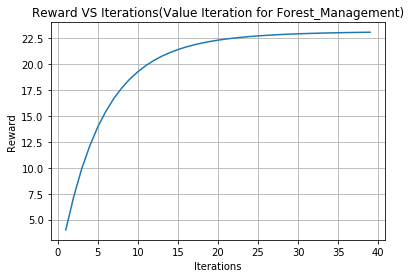

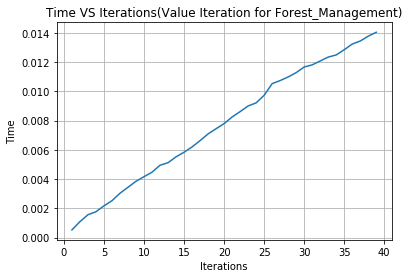

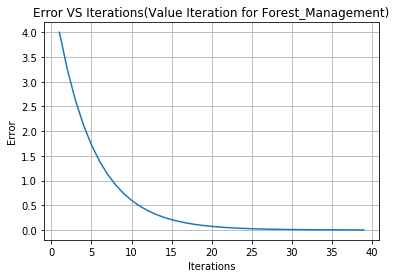

Optimal value 23.089675091923866
Iterations 39
Optimal Policy (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [486]:
transitions, rewards = forest(S=100, r1=4, r2=2, p=0.1, is_sparse=False)
stats = mdp_algorithms('Value Iteration',transitions, rewards,"Forest_Management", gamma,True)
df_optim = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
print("Optimal value",df_optim['Optimal value'][0])
print("Iterations",df_optim['Iterations'][0])
print("Optimal Policy",df_optim['Optimal Policy'][0])

In [487]:
df_policy= pd.DataFrame()
for states in [5,50,100,1000]:
    for prob in [0.1,0.5,0.9]:
        for R1 in [4]:
            for R2 in [2]:
                for gamma in [0.1,0.9]:
                    statistics = []
                    transitions, rewards = forest(S=states, r1=R1, r2=R2, p=prob, is_sparse=False)
                    statistics.append([states,prob,R1,R2,gamma])
                    df1 = pd.DataFrame(statistics,columns = ['States','Probability','R1','R2','Discount'])
                    stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Forest_Management", gamma,False)
                    df2 = pd.DataFrame(stats, columns=['Algorithm', 'Rewards', 'Iterations',  'Time', 'Optimal_Policy'])
                    result = pd.concat([df1, df2], axis=1)
                    df_policy = df_policy.append(result)
                    

 Iteration   Variation
         1           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           1
         2           1
         3           1
         4           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           1
         2           1
         3           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           0
It

In [488]:
dfi.export(df_policy[[i for i in list(df_policy.columns) if i != 'Optimal_Policy']], 'df_policy.png')
df_policy[[i for i in list(df_policy.columns) if i != 'Optimal_Policy']]

,States,Probability,R1,R2,Discount,Algorithm,Rewards,Iterations,Time
0,5,0.1,4,2,0.1,Policy Iteration,4.396613,1,1.920938
0,5,0.1,4,2,0.9,Policy Iteration,29.208852,4,2.098083
0,5,0.5,4,2,0.1,Policy Iteration,4.213311,1,0.606060
0,5,0.5,4,2,0.9,Policy Iteration,9.811912,3,2.472878
0,5,0.9,4,2,0.1,Policy Iteration,4.041404,1,0.463963
0,5,0.9,4,2,0.9,Policy Iteration,5.130558,1,0.453949
0,50,0.1,4,2,0.1,Policy Iteration,4.396613,1,0.884056
0,50,0.1,4,2,0.9,Policy Iteration,23.172434,10,8.594990
0,50,0.5,4,2,0.1,Policy Iteration,4.213311,1,0.714064
0,50,0.5,4,2,0.9,Policy Iteration,9.811912,3,2.319813


 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           0
Iterating stopped, unchanging policy found.


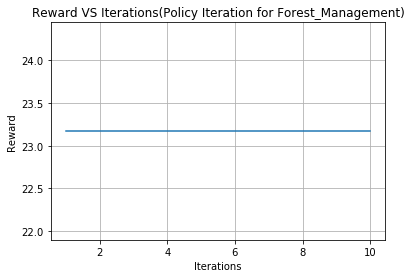

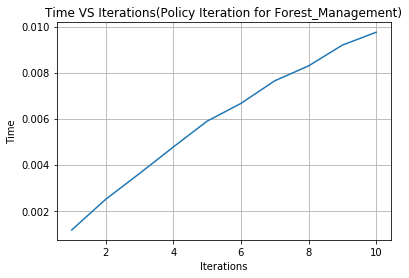

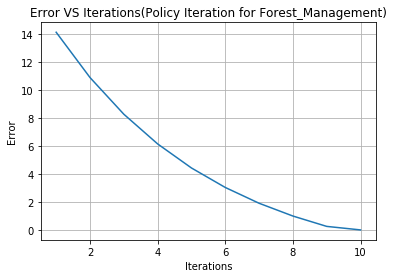

Optimal value 23.172433847048566
Iterations 10
Optimal Policy (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [489]:
transitions, rewards = forest(S=50, r1=4, r2=2, p=0.1, is_sparse=False)
stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Forest_Management", gamma,True)
df_optim = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
print("Optimal value",df_optim['Optimal value'][0])
print("Iterations",df_optim['Iterations'][0])
print("Optimal Policy",df_optim['Optimal Policy'][0])

In [490]:
merged_df = df_value.merge(df_policy, how='inner', left_on=['States','Probability','R1','R2','Discount'], right_on=['States','Probability','R1','R2','Discount'])


In [491]:
dfi.export(merged_df[[i for i in list(merged_df.columns) if i not in ['Optimal_Policy_y','Optimal_Policy_x']]], 'df_merged.png')
merged_df[[i for i in list(merged_df.columns) if i not in ['Optimal_Policy_y','Optimal_Policy_x']]]

,States,Probability,R1,R2,Discount,Algorithm_x,Rewards_x,Iterations_x,Time_x,Algorithm_y,Rewards_y,Iterations_y,Time_y
0,5,0.1,4,2,0.1,Value Iteration,4.360000,2,0.491142,Policy Iteration,4.396613,1,1.920938
1,5,0.1,4,2,0.9,Value Iteration,15.482565,6,1.161814,Policy Iteration,29.208852,4,2.098083
2,5,0.5,4,2,0.1,Value Iteration,4.200000,2,0.225067,Policy Iteration,4.213311,1,0.606060
3,5,0.5,4,2,0.9,Value Iteration,8.764919,11,1.421213,Policy Iteration,9.811912,3,2.472878
4,5,0.9,4,2,0.1,Value Iteration,4.000000,1,0.140905,Policy Iteration,4.041404,1,0.463963
5,5,0.9,4,2,0.9,Value Iteration,4.533826,4,0.390291,Policy Iteration,5.130558,1,0.453949
6,50,0.1,4,2,0.1,Value Iteration,4.360000,2,1.086950,Policy Iteration,4.396613,1,0.884056
7,50,0.1,4,2,0.9,Value Iteration,23.089675,39,7.780790,Policy Iteration,23.172434,10,8.594990
8,50,0.5,4,2,0.1,Value Iteration,4.200000,2,0.416994,Policy Iteration,4.213311,1,0.714064
9,50,0.5,4,2,0.9,Value Iteration,8.764919,11,2.039909,Policy Iteration,9.811912,3,2.319813


In [492]:
df_qlearn= pd.DataFrame()
for states in [5,50,100,1000]:
    for prob in [0.1,0.5,0.9]:
        for R1 in [4]:
            for R2 in [2]:
                for gamma in [0.1,0.9]:
                    statistics = []
                    transitions, rewards = forest(S=states, r1=R1, r2=R2, p=prob, is_sparse=False)
                    statistics.append([states,prob,R1,R2,gamma])
                    df1 = pd.DataFrame(statistics,columns = ['States','Probability','R1','R2','Discount'])
                    stats = mdp_algorithms('Q learning',transitions, rewards,"Forest_Management", gamma,False)
                    df2 = pd.DataFrame(stats, columns=['Algorithm', 'Rewards', 'Iterations',  'Time', 'Optimal_Policy'])
                    result = pd.concat([df1, df2], axis=1)
                    df_qlearn = df_qlearn.append(result)
                    

In [493]:
dfi.export(df_qlearn[[i for i in list(df_qlearn.columns) if i != 'Optimal_Policy']], 'df_qlearn.png')
df_qlearn[[i for i in list(df_qlearn.columns) if i != 'Optimal_Policy']]

,States,Probability,R1,R2,Discount,Algorithm,Rewards,Iterations,Time
0,5,0.1,4,2,0.1,Q learning,4.372601,10000,574.160814
0,5,0.1,4,2,0.9,Q learning,9.959830,10000,370.374203
0,5,0.5,4,2,0.1,Q learning,3.266763,10000,370.573044
0,5,0.5,4,2,0.9,Q learning,5.364677,10000,401.806116
0,5,0.9,4,2,0.1,Q learning,0.812083,10000,396.126032
0,5,0.9,4,2,0.9,Q learning,1.698274,10000,386.415005
0,50,0.1,4,2,0.1,Q learning,1.009159,10000,425.915718
0,50,0.1,4,2,0.9,Q learning,4.884000,10000,382.441998
0,50,0.5,4,2,0.1,Q learning,1.005287,10000,420.196056
0,50,0.5,4,2,0.9,Q learning,3.782138,10000,394.179821


In [494]:
merged_df2 = df_qlearn.merge(merged_df, how='inner', left_on=['States','Probability','R1','R2','Discount'], right_on=['States','Probability','R1','R2','Discount'])

In [495]:
dfi.export(merged_df2[[i for i in list(merged_df2.columns) if i not in ['Optimal_Policy','Optimal_Policy_y','Optimal_Policy_x']]], 'df_merged2.png')
merged_df2[[i for i in list(merged_df2.columns) if i not in ['Optimal_Policy','Optimal_Policy_y','Optimal_Policy_x']]]


,States,Probability,R1,R2,Discount,Algorithm,Rewards,Iterations,Time,Algorithm_x,Rewards_x,Iterations_x,Time_x,Algorithm_y,Rewards_y,Iterations_y,Time_y
0,5,0.1,4,2,0.1,Q learning,4.372601,10000,574.160814,Value Iteration,4.360000,2,0.491142,Policy Iteration,4.396613,1,1.920938
1,5,0.1,4,2,0.9,Q learning,9.959830,10000,370.374203,Value Iteration,15.482565,6,1.161814,Policy Iteration,29.208852,4,2.098083
2,5,0.5,4,2,0.1,Q learning,3.266763,10000,370.573044,Value Iteration,4.200000,2,0.225067,Policy Iteration,4.213311,1,0.606060
3,5,0.5,4,2,0.9,Q learning,5.364677,10000,401.806116,Value Iteration,8.764919,11,1.421213,Policy Iteration,9.811912,3,2.472878
4,5,0.9,4,2,0.1,Q learning,0.812083,10000,396.126032,Value Iteration,4.000000,1,0.140905,Policy Iteration,4.041404,1,0.463963
5,5,0.9,4,2,0.9,Q learning,1.698274,10000,386.415005,Value Iteration,4.533826,4,0.390291,Policy Iteration,5.130558,1,0.453949
6,50,0.1,4,2,0.1,Q learning,1.009159,10000,425.915718,Value Iteration,4.360000,2,1.086950,Policy Iteration,4.396613,1,0.884056
7,50,0.1,4,2,0.9,Q learning,4.884000,10000,382.441998,Value Iteration,23.089675,39,7.780790,Policy Iteration,23.172434,10,8.594990
8,50,0.5,4,2,0.1,Q learning,1.005287,10000,420.196056,Value Iteration,4.200000,2,0.416994,Policy Iteration,4.213311,1,0.714064
9,50,0.5,4,2,0.9,Q learning,3.782138,10000,394.179821,Value Iteration,8.764919,11,2.039909,Policy Iteration,9.811912,3,2.319813


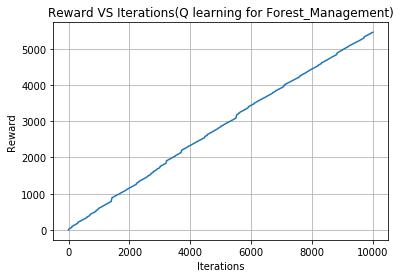

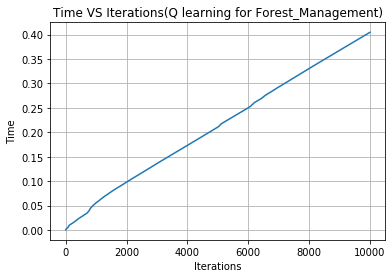

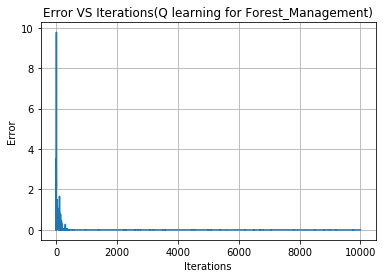

Optimal value 14.581726756333179
Iterations 10000
Optimal Policy (0, 1, 1, 0, 0)


In [496]:
transitions, rewards = forest(S=5, r1=4, r2=2, p=0.1, is_sparse=False)
stats = mdp_algorithms('Q learning',transitions, rewards,"Forest_Management", gamma, True)
df_optim = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
print("Optimal value",df_optim['Optimal value'][0])
print("Iterations",df_optim['Iterations'][0])
print("Optimal Policy",df_optim['Optimal Policy'][0])

time [2.9517014821370444, 19.158174594243366, 449.5376447836558]


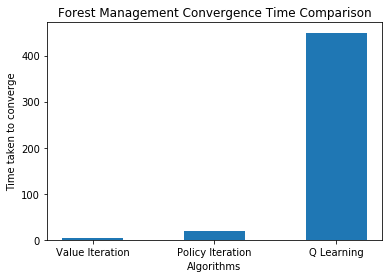

In [497]:
algos = ['Value Iteration', 'Policy Iteration', 'Q Learning']
ticks = [0, 1 , 2]
time = [df_value['Time'].mean(axis=0), df_policy['Time'].mean(axis=0) , df_qlearn['Time'].mean(axis=0)]
print("time",time)
plt.bar(ticks, height=time, width=0.5)
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Time taken to converge')
plt.title('Forest Management Convergence Time Comparison')
plt.savefig("Forest_Management/time_comparison.png")
plt.show()
plt.close()

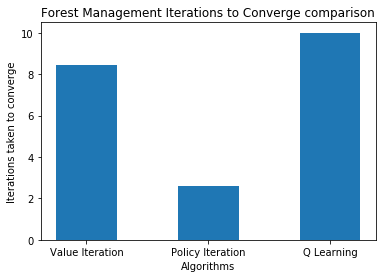

In [498]:
iters = [df_value['Iterations'].mean(axis=0), df_policy['Iterations'].mean(axis=0), df_qlearn['Iterations'].mean(axis=0)]
plt.bar(ticks, height=iters, width=0.5)
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Iterations taken to converge')
plt.title('Forest Management Iterations to Converge comparison')
plt.savefig("Forest_Management/iter_comparison.png")
plt.show()
plt.close()

In [499]:
def compare_policy(policy1, policy2):
    for x in range(len(policy1)):
        if not (policy1[x] == policy2[x]):
            return "Different Policy"
            break
    return "Same Policy"

In [500]:
print("Policy Iteration and Value Iteration Results: %s" % compare_policy([i for i in df_policy['Optimal_Policy']], [i for i in df_value['Optimal_Policy']]))
print("Policy Iteration and QLearner Results: %s" % compare_policy([i for i in df_policy['Optimal_Policy']], [i for i in df_qlearn['Optimal_Policy']]))
print("QLearner and Value Iteration  Results: %s" % compare_policy([i for i in df_qlearn['Optimal_Policy']], [i for i in df_value['Optimal_Policy']]))
      

Policy Iteration and Value Iteration Results: Same Policy
Policy Iteration and QLearner Results: Different Policy
QLearner and Value Iteration  Results: Different Policy


In [501]:
MAPS = {
    "4x4": [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ],
    "20x20": [
        "SFFFFFFHHHFFFFFFFFFF",
        "FFFFFFFFFFFFFFFFHHFF",
        "FFFHFFFFFFFHHFFFFFFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFFFFHFFFFFFFHHFF",
        "FFFFFHFFFFHHFFFFHHFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFFFFFFFHHHHHHHFF",
        "HHHHFHFFFFFFFFFFHHFF",
        "FFFFFHFFFFHHHFFFHHFF",
        "FFFFFFFFFFFFFFFFHHFF",
        "FFFFFHFFFFFFHFFFHHFF",
        "FFFFFHFFFFFFFFFFHHFF",
        "FFFFFFFFFFFHFFFFFFFF",
        "FHHFFFHFFFFHFFFFFHFF",
        "FHHFHFHFFFFFFFFFFFFF",
        "FFFHFFFFFHFFFFHHFHFG"
    ]
}

In [502]:
def plot_policy(map_name, policy, approach, algo_name):
    size = len(MAPS[map_name])
    data =  np.zeros((size,size))
    for i, row in enumerate(MAPS[map_name]):
        for j, loc in enumerate(row):
            if loc == "S":
                data[i, j] = 0
            elif loc == "F":
                data[i, j] = 0
            elif loc == "H":
                data[i, j] = -1
            elif loc == "G":
                data[i, j] = 1
    size = int(np.sqrt(len(policy)))
    pol = np.asarray(policy)
    np_pol = pol.reshape((size, size))
    plt.imshow(data, interpolation="nearest")
    plt.xticks([])
    plt.yticks([])
    plt.title("Policy for " + map_name + " using " + algo_name+"("+approach+")")
    for i in range(np_pol[0].size):
        for j in range(np_pol[0].size):
            arrow = '<'
            if np_pol[i, j] == 1:
                arrow = 'v'
            elif np_pol[i, j] == 2:
                arrow = '>'
            elif np_pol[i, j] == 3:
                arrow = '^'
            text = plt.text(j, i, arrow, ha="center", va="center", color="w")
    plt.savefig('Frozen_Lake/policy_' + map_name + '_'+approach+algo_name+'.png')
    plt.show()
    plt.close()

In [503]:
def environment_creation(map_name, slippery, gamma):
    env = gym.make('FrozenLake-v0', desc=MAPS[map_name], is_slippery=slippery)
    size_map = int(map_name.split('x')[0])
    #env.render()
    env.reset()
    P = np.zeros((4, size_map*size_map, size_map*size_map))
    R = np.zeros((size_map*size_map, 4))
    for state in env.env.P:
        for action in env.env.P[state]:
            for option in env.env.P[state][action]:
                P[action][state][option[1]] += option[0]
                R[state][action] += option[2]
    return P, R, gamma

 Iteration   Variation
         1    1.000000
         2    0.900000
         3    0.810000
         4    0.729000
         5    0.656100
         6    0.590490
         7    0.000000
Iterating stopped, epsilon-optimal policy found.


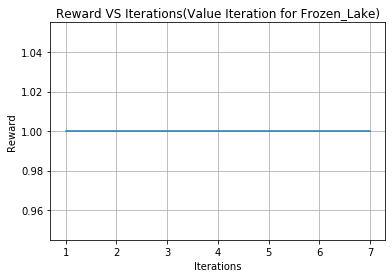

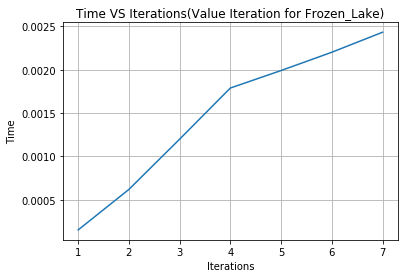

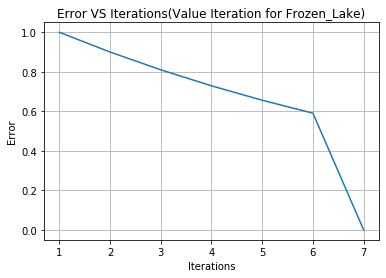

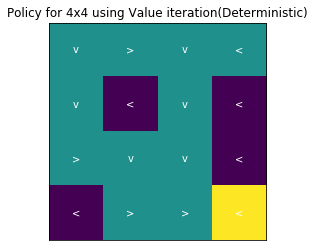

Optimal value (Deterministic) for 4x4 1.0
Iterations (Deterministic) for4x4 7
Optimal Policy(Deterministic) for4x4 (1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0)
Time taken(Deterministic) for4x4 2.586841583251953
 Iteration   Variation
         1    1.000000
         2    0.900000
         3    0.810000
         4    0.729000
         5    0.656100
         6    0.590490
         7    0.531441
         8    0.478297
         9    0.430467
        10    0.387420
        11    0.348678
        12    0.313811
        13    0.282430
        14    0.254187
        15    0.000000
Iterating stopped, epsilon-optimal policy found.


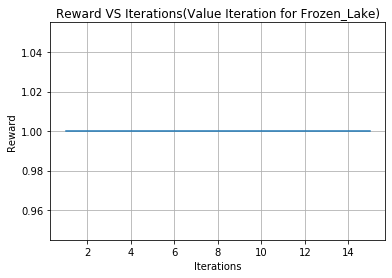

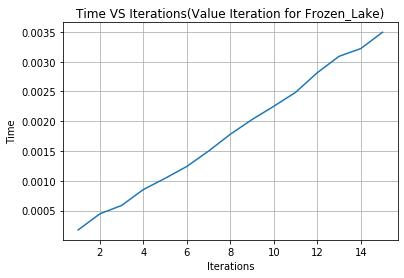

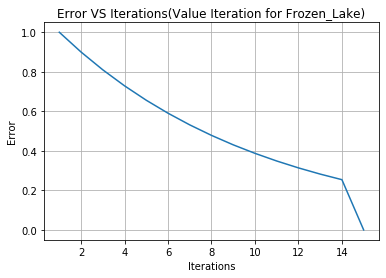

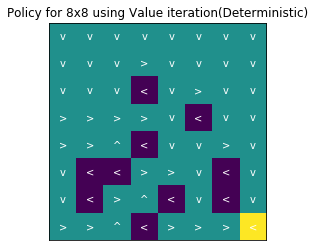

Optimal value (Deterministic) for 8x8 1.0
Iterations (Deterministic) for8x8 15
Optimal Policy(Deterministic) for8x8 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0)
Time taken(Deterministic) for8x8 3.5529136657714844
 Iteration   Variation
         1    1.000000
         2    0.900000
         3    0.810000
         4    0.729000
         5    0.656100
         6    0.590490
         7    0.531441
         8    0.478297
         9    0.430467
        10    0.387420
        11    0.348678
        12    0.313811
        13    0.282430
        14    0.254187
        15    0.228768
        16    0.205891
        17    0.185302
        18    0.166772
        19    0.150095
        20    0.135085
        21    0.121577
        22    0.109419
        23    0.098477
        24    0.088629
        25    0.079766
        26    0.071790
        27    0.06

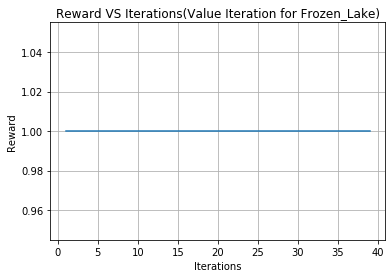

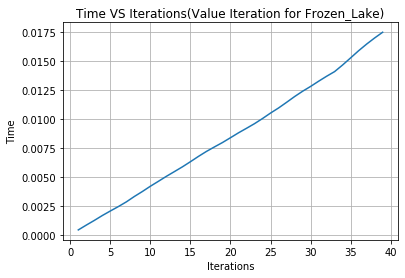

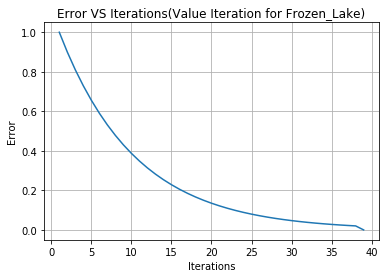

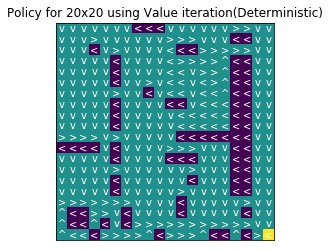

Optimal value (Deterministic) for 20x20 1.0
Iterations (Deterministic) for20x20 39
Optimal Policy(Deterministic) for20x20 (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0

In [504]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, False, gamma=0.9)
    stats = mdp_algorithms('Value Iteration',transitions, rewards,"Frozen_Lake", gamma,True)
    df_value = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps,df_value['Optimal Policy'][0], 'Deterministic', "Value iteration")
    print("Optimal value (Deterministic) for "+maps,df_value['Optimal value'][0])
    print("Iterations (Deterministic) for"+maps,df_value['Iterations'][0])
    print("Optimal Policy(Deterministic) for"+maps,df_value['Optimal Policy'][0])
    print("Time taken(Deterministic) for"+maps,df_value['Time'][0])

 Iteration   Variation
         1    1.000000
         2    0.300000
         3    0.180000
         4    0.162000
         5    0.105300
         6    0.087480
         7    0.061965
         8    0.050082
         9    0.037988
        10    0.029958
        11    0.024186
        12    0.019422
        13    0.016423
        14    0.014078
        15    0.011962
        16    0.010260
        17    0.009119
        18    0.008141
        19    0.007308
        20    0.006526
        21    0.005804
        22    0.005145
        23    0.004548
        24    0.004012
        25    0.003533
        26    0.003106
        27    0.002728
        28    0.002393
        29    0.002098
        30    0.001837
        31    0.001609
        32    0.001407
        33    0.001231
        34    0.001076
Iterating stopped, epsilon-optimal policy found.


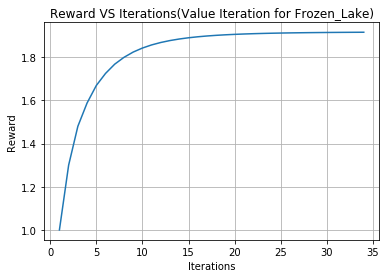

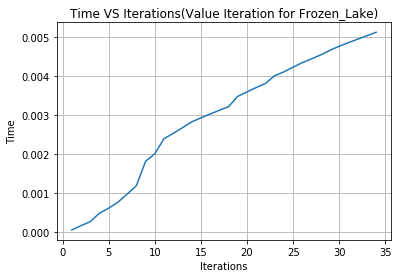

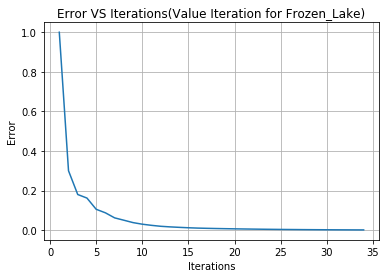

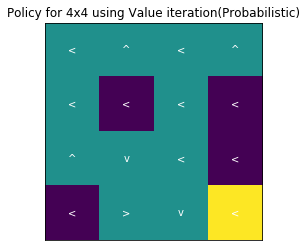

Optimal value (Probabilistic) for 4x4 1.9156384309573595
Iterations (Probabilistic) for4x4 34
Optimal Policy(Probabilistic) for4x4 (0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
Time taken(Probabilistic) for4x4 5.224943161010742
 Iteration   Variation
         1    1.000000
         2    0.300000
         3    0.180000
         4    0.135000
         5    0.097200
         6    0.072900
         7    0.055404
         8    0.043084
         9    0.035298
        10    0.029367
        11    0.024671
        12    0.020684
        13    0.017478
        14    0.014814
        15    0.012769
        16    0.011104
        17    0.009579
        18    0.008321
        19    0.007331
        20    0.006449
        21    0.005688
        22    0.005027
        23    0.004486
        24    0.004023
        25    0.003613
        26    0.003232
        27    0.002891
        28    0.002579
        29    0.002294
        30    0.002036
        31    0.001804
        32    0.001598
        33

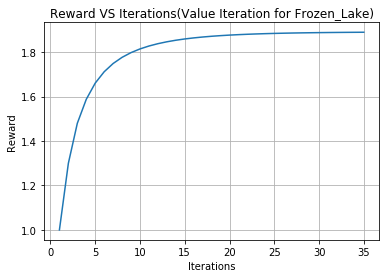

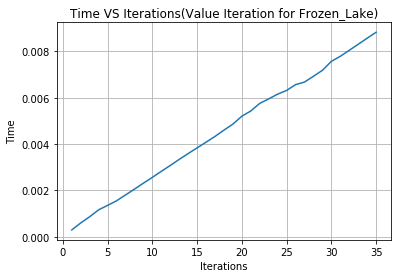

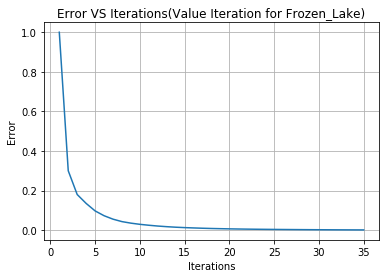

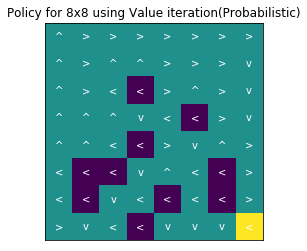

Optimal value (Probabilistic) for 8x8 1.8898245217404024
Iterations (Probabilistic) for8x8 35
Optimal Policy(Probabilistic) for8x8 (3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 1, 3, 2, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0)
Time taken(Probabilistic) for8x8 8.884906768798828
 Iteration   Variation
         1    1.000000
         2    0.600000
         3    0.270000
         4    0.243000
         5    0.170100
         6    0.126360
         7    0.103518
         8    0.075451
         9    0.066922
        10    0.053794
        11    0.045054
        12    0.038009
        13    0.031697
        14    0.027748
        15    0.023142
        16    0.019935
        17    0.017303
        18    0.014912
        19    0.013023
        20    0.011180
        21    0.009684
        22    0.008484
        23    0.007420
        24    0.006506
        25    0.005665
        26    0.004940
    

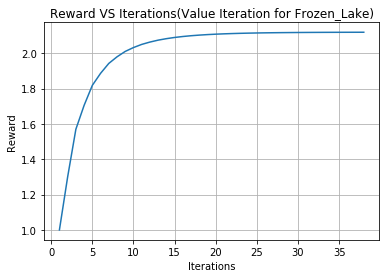

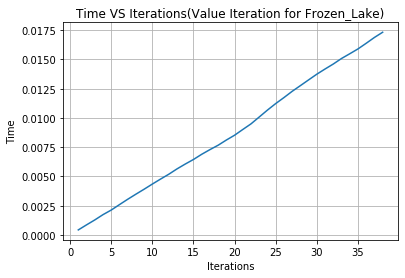

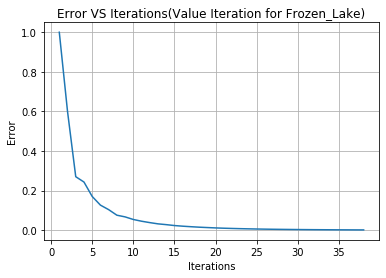

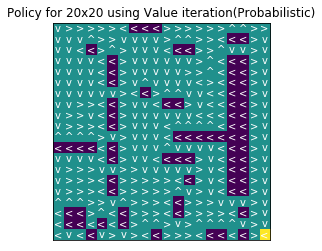

Optimal value (Probabilistic) for 20x20 2.119189752556628
Iterations (Probabilistic) for20x20 38
Optimal Policy(Probabilistic) for20x20 (1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 3, 2, 1, 1, 1, 0, 0, 0, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 3, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 3, 3, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 2, 1, 3, 3, 3, 3, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2,

In [505]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, True, gamma=0.9)
    stats = mdp_algorithms('Value Iteration',transitions, rewards,"Frozen_Lake", gamma,True)
    df_value_slip = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps,df_value_slip['Optimal Policy'][0], 'Probabilistic', "Value iteration")
    print("Optimal value (Probabilistic) for "+maps,df_value_slip['Optimal value'][0])
    print("Iterations (Probabilistic) for"+maps,df_value_slip['Iterations'][0])
    print("Optimal Policy(Probabilistic) for"+maps,df_value_slip['Optimal Policy'][0])
    print("Time taken(Probabilistic) for"+maps,df_value_slip['Time'][0])

 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.


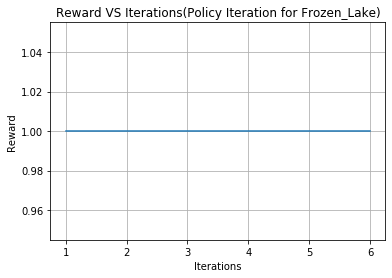

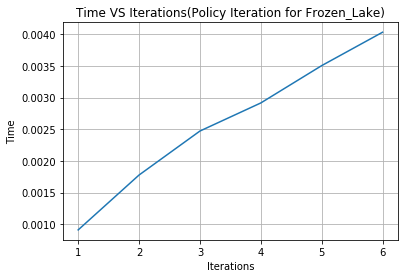

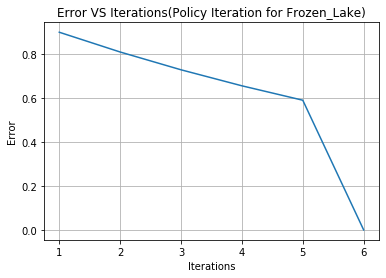

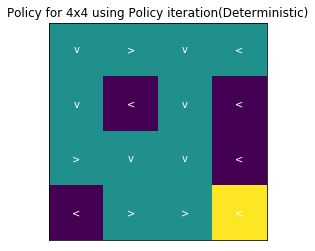

Optimal value (Deterministic) for 4x4 1.0
Iterations (Deterministic) for4x4 6
Optimal Policy(Deterministic) for4x4 (1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0)
Time taken(Deterministic) for4x4 4.098653793334961
 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9           6
        10           6
        11           5
        12           3
        13           1
        14           0
Iterating stopped, unchanging policy found.


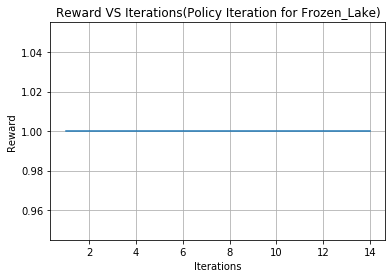

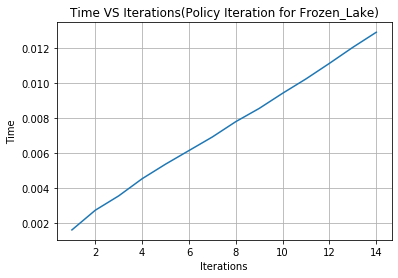

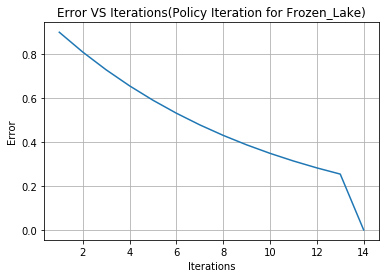

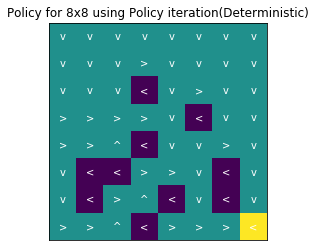

Optimal value (Deterministic) for 8x8 1.0
Iterations (Deterministic) for8x8 14
Optimal Policy(Deterministic) for8x8 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0)
Time taken(Deterministic) for8x8 12.974023818969727
 Iteration   Variation
         1           2
         2           3
         3           3
         4           6
         5           5
         6           5
         7           7
         8           8
         9           8
        10           9
        11           9
        12          11
        13           9
        14           8
        15           8
        16          10
        17           9
        18          11
        19          17
        20          20
        21          19
        22          23
        23          19
        24          19
        25          18
        26          14
        27        

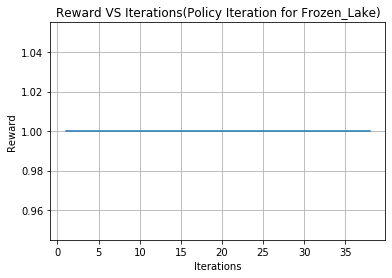

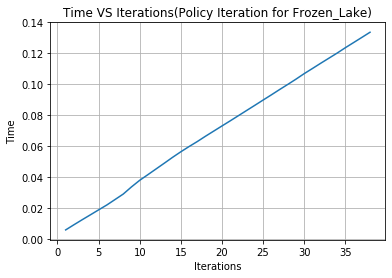

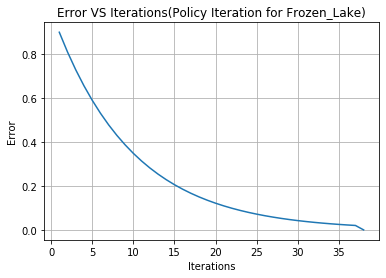

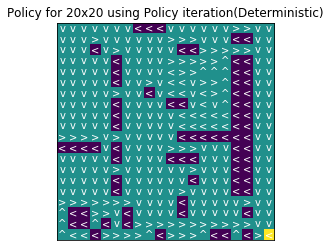

Optimal value (Deterministic) for 20x20 1.0
Iterations (Deterministic) for20x20 38
Optimal Policy(Deterministic) for20x20 (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 3, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0

In [506]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, False, gamma=0.9)
    stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Frozen_Lake", gamma,True)
    df_policy = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps, df_policy['Optimal Policy'][0], 'Deterministic', "Policy iteration")
    print("Optimal value (Deterministic) for "+maps,df_policy['Optimal value'][0])
    print("Iterations (Deterministic) for"+maps,df_policy['Iterations'][0])
    print("Optimal Policy(Deterministic) for"+maps,df_policy['Optimal Policy'][0])
    print("Time taken(Deterministic) for"+maps,df_policy['Time'][0])

 Iteration   Variation
         1           7
         2           6
         3           3
         4           1
         5           0
Iterating stopped, unchanging policy found.


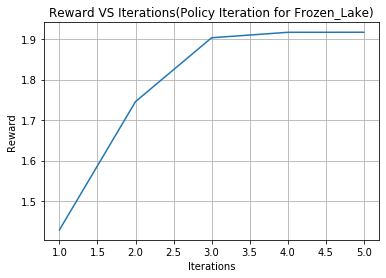

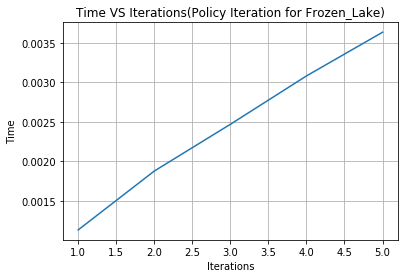

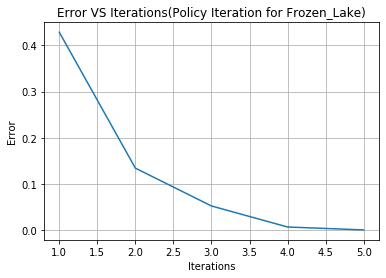

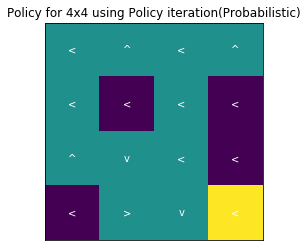

Optimal value (Probabilistic) for 4x4 1.9170604443558334
Iterations (Probabilistic) for4x4 5
Optimal Policy(Probabilistic) for4x4 (0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
Time taken(Probabilistic) for4x4 3.699064254760742
 Iteration   Variation
         1          33
         2          34
         3          18
         4           3
         5           1
         6           0
Iterating stopped, unchanging policy found.


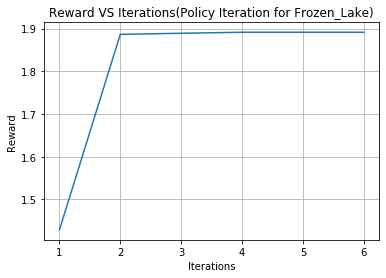

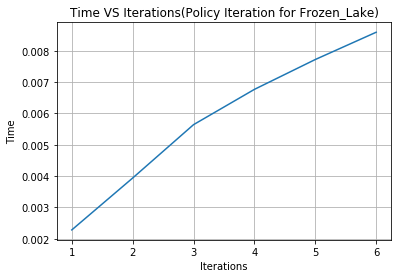

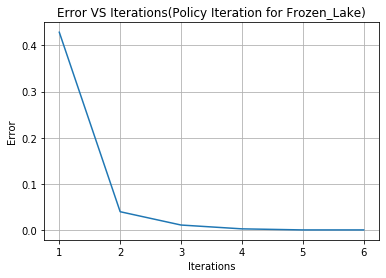

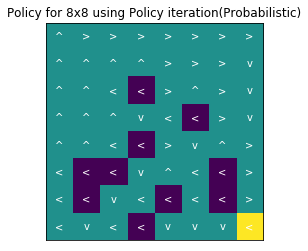

Optimal value (Probabilistic) for 8x8 1.8915413942845958
Iterations (Probabilistic) for8x8 6
Optimal Policy(Probabilistic) for8x8 (3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0)
Time taken(Probabilistic) for8x8 8.664846420288086
 Iteration   Variation
         1          46
         2          27
         3          15
         4          30
         5         144
         6         171
         7         136
         8          70
         9          24
        10          10
        11           3
        12           1
        13           0
Iterating stopped, unchanging policy found.


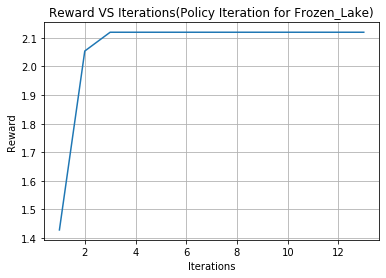

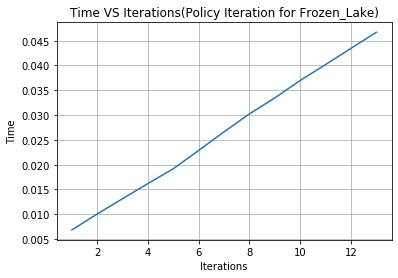

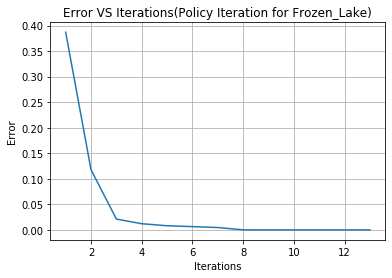

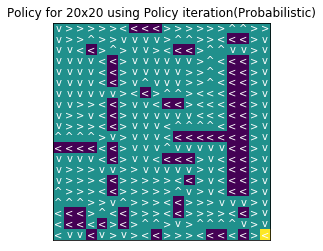

Optimal value (Probabilistic) for 20x20 2.119710395856334
Iterations (Probabilistic) for20x20 13
Optimal Policy(Probabilistic) for20x20 (1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 3, 2, 1, 1, 2, 0, 0, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 3, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 3, 1, 1, 1, 2, 2, 3, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 3, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 2, 1, 3, 3, 3, 3, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2,

In [507]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, True, gamma=0.9)
    stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Frozen_Lake", gamma,True)
    df_policy_slip = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps, df_policy_slip['Optimal Policy'][0], 'Probabilistic', "Policy iteration")
    print("Optimal value (Probabilistic) for "+maps,df_policy_slip['Optimal value'][0])
    print("Iterations (Probabilistic) for"+maps,df_policy_slip['Iterations'][0])
    print("Optimal Policy(Probabilistic) for"+maps,df_policy_slip['Optimal Policy'][0])
    print("Time taken(Probabilistic) for"+maps,df_policy_slip['Time'][0])

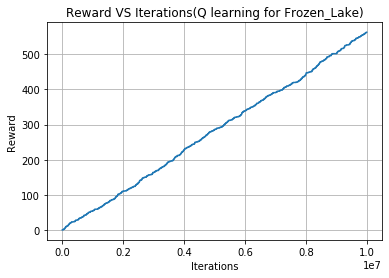

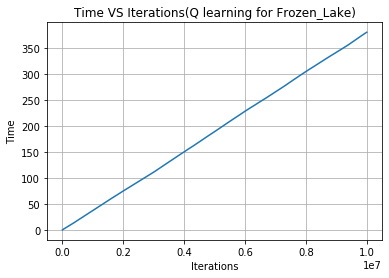

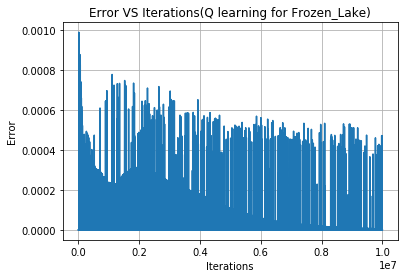

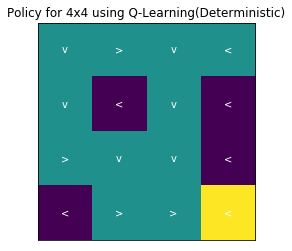

Optimal value (Deterministic) for 4x4 0.9999999999999445
Iterations (Deterministic) for4x4 10000000
Optimal Policy(Deterministic) for4x4 (1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0)
Time taken(Deterministic) for4x4 380748.407125473


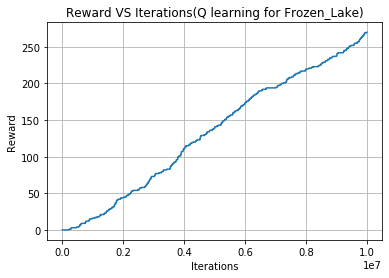

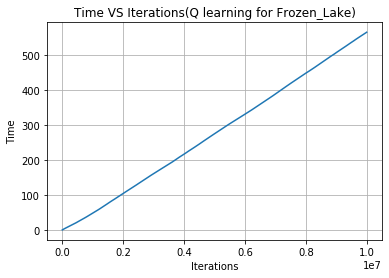

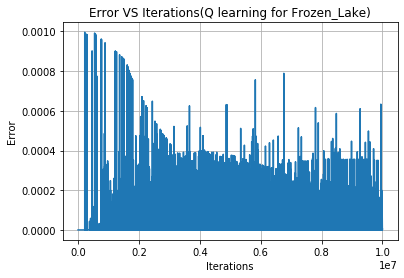

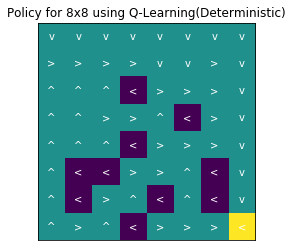

Optimal value (Deterministic) for 8x8 0.9999999999999445
Iterations (Deterministic) for8x8 10000000
Optimal Policy(Deterministic) for8x8 (1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 3, 2, 2, 3, 0, 2, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 0, 0, 2, 2, 3, 0, 1, 3, 0, 2, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 2, 2, 0)
Time taken(Deterministic) for8x8 565580.4898738861


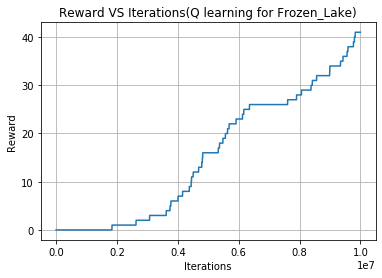

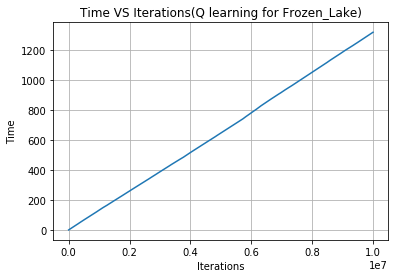

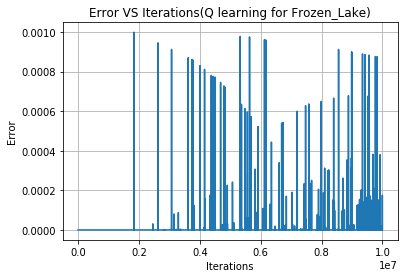

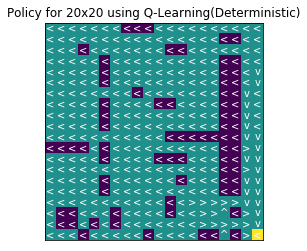

Optimal value (Deterministic) for 20x20 0.9599492978106857
Iterations (Deterministic) for20x20 10000000
Optimal Policy(Deterministic) for20x20 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0

In [508]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, False, gamma=0.9)
    stats = mdp_algorithms('Q learning',transitions, rewards,"Frozen_Lake", gamma,True)
    df_qlearn = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps, df_qlearn['Optimal Policy'][0], 'Deterministic', "Q-Learning")
    print("Optimal value (Deterministic) for "+maps,df_qlearn['Optimal value'][0])
    print("Iterations (Deterministic) for"+maps,df_qlearn['Iterations'][0])
    print("Optimal Policy(Deterministic) for"+maps,df_qlearn['Optimal Policy'][0])
    print("Time taken(Deterministic) for"+maps,df_qlearn['Time'][0])

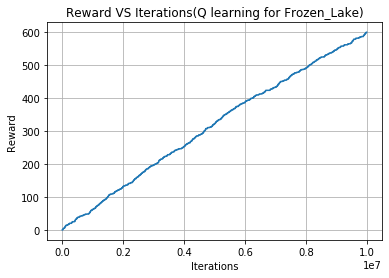

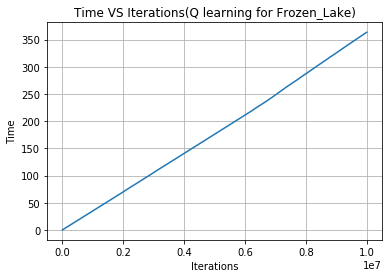

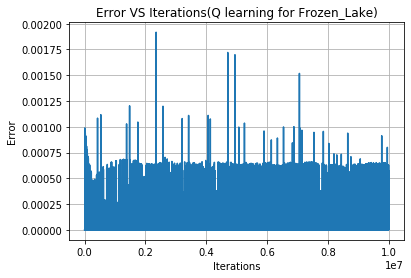

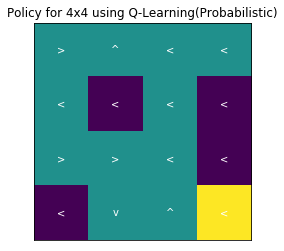

Optimal value (Probabilistic) for 4x4 1.3366424953680358
Iterations (Probabilistic) for4x4 10000000
Optimal Policy(Probabilistic) for4x4 (2, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0)
Time taken(Probabilistic) for4x4 363529.1841030121


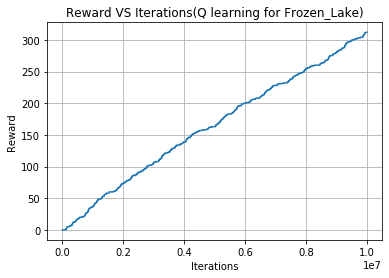

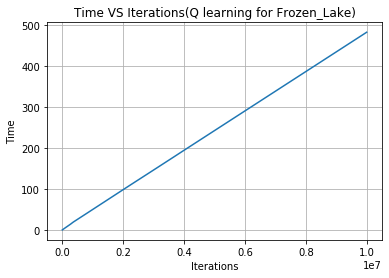

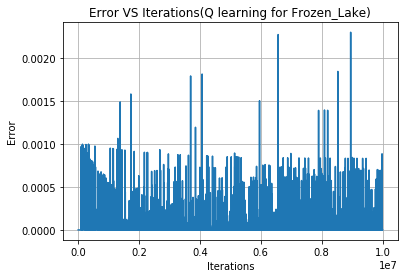

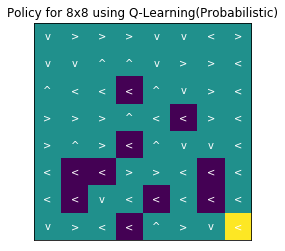

Optimal value (Probabilistic) for 8x8 1.695378975119222
Iterations (Probabilistic) for8x8 10000000
Optimal Policy(Probabilistic) for8x8 (1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 3, 3, 1, 2, 2, 0, 3, 0, 0, 0, 3, 1, 2, 0, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 2, 1, 0)
Time taken(Probabilistic) for8x8 483076.1208534241


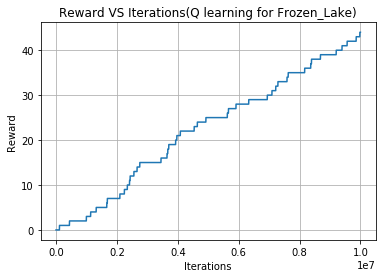

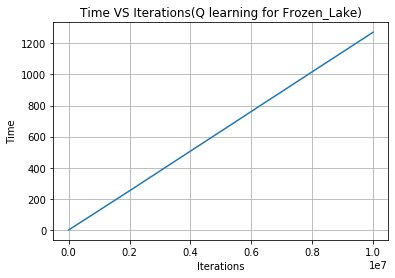

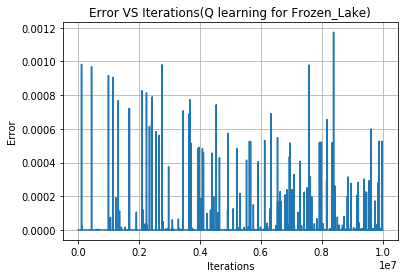

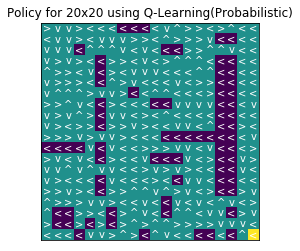

Optimal value (Probabilistic) for 20x20 1.0352928515381894
Iterations (Probabilistic) for20x20 10000000
Optimal Policy(Probabilistic) for20x20 (2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2, 0, 2, 3, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 3, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 3, 3, 3, 1, 0, 1, 0, 0, 0, 2, 2, 3, 3, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 3, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 3, 3, 2, 1, 1, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 3, 2, 0, 1, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 3, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 3, 1, 3, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0

In [509]:
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, True, gamma=0.9)
    stats = mdp_algorithms('Q learning',transitions, rewards,"Frozen_Lake", gamma,True)
    df_qlearn_slip = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    plot_policy(maps, df_qlearn_slip['Optimal Policy'][0], 'Probabilistic', "Q-Learning")
    print("Optimal value (Probabilistic) for "+maps,df_qlearn_slip['Optimal value'][0])
    print("Iterations (Probabilistic) for"+maps,df_qlearn_slip['Iterations'][0])
    print("Optimal Policy(Probabilistic) for"+maps,df_qlearn_slip['Optimal Policy'][0])
    print("Time taken(Probabilistic) for"+maps,df_qlearn_slip['Time'][0])
    

In [510]:
#Deterministic
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, False, gamma=0.9)
    stats = mdp_algorithms('Value Iteration',transitions, rewards,"Frozen_Lake", gamma,False)
    df_value = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Frozen_Lake", gamma,False)
    df_policy = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    stats = mdp_algorithms('Q learning',transitions, rewards,"Frozen_Lake", gamma,False)
    df_qlearn = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    print("Policy Iteration and Value Iteration Results for "+ maps+": %s" % compare_policy([i for i in df_policy['Optimal Policy']], [i for i in df_value['Optimal Policy']]))
    print("Policy Iteration and QLearner Results for "+maps+": %s" % compare_policy([i for i in df_policy['Optimal Policy']], [i for i in df_qlearn['Optimal Policy']]))
    print("QLearner and Value Iteration  Results for "+maps+": %s" % compare_policy([i for i in df_qlearn['Optimal Policy']], [i for i in df_value['Optimal Policy']]))
      

 Iteration   Variation
         1    1.000000
         2    0.900000
         3    0.810000
         4    0.729000
         5    0.656100
         6    0.590490
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
Policy Iteration and Value Iteration Results for 4x4: Same Policy
Policy Iteration and QLearner Results for 4x4: Same Policy
QLearner and Value Iteration  Results for 4x4: Same Policy
 Iteration   Variation
         1    1.000000
         2    0.900000
         3    0.810000
         4    0.729000
         5    0.656100
         6    0.590490
         7    0.531441
         8    0.478297
         9    0.430467
        10    0.387420
        11    0.348678
        12    0.313811
        13    0.282430
        14    0.254187
        15    0.000000
Iterating 

In [514]:
#Probabilistic
for maps in ('4x4','8x8','20x20'):
    transitions, rewards, gamma = environment_creation(maps, True, gamma=0.9)
    stats = mdp_algorithms('Value Iteration',transitions, rewards,"Frozen_Lake", gamma,False)
    df_value = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    stats = mdp_algorithms('Policy Iteration',transitions, rewards,"Frozen_Lake", gamma,False)
    df_policy = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    stats = mdp_algorithms('Q learning',transitions, rewards,"Frozen_Lake", gamma,False)
    df_qlearn = pd.DataFrame(stats, columns=['Algorithm', 'Optimal value', 'Iterations',  'Time', 'Optimal Policy'])
    print("Policy Iteration and Value Iteration Results for "+maps+": %s" % compare_policy([i for i in df_policy['Optimal Policy']], [i for i in df_value['Optimal Policy']]))
    print("Policy Iteration and QLearner Results for "+maps+": %s" % compare_policy([i for i in df_policy['Optimal Policy']], [i for i in df_qlearn['Optimal Policy']]))
    print("QLearner and Value Iteration  Results for "+maps+": %s" % compare_policy([i for i in df_qlearn['Optimal Policy']], [i for i in df_value['Optimal Policy']]))
      

 Iteration   Variation
         1    1.000000
         2    0.300000
         3    0.180000
         4    0.162000
         5    0.105300
         6    0.087480
         7    0.061965
         8    0.050082
         9    0.037988
        10    0.029958
        11    0.024186
        12    0.019422
        13    0.016423
        14    0.014078
        15    0.011962
        16    0.010260
        17    0.009119
        18    0.008141
        19    0.007308
        20    0.006526
        21    0.005804
        22    0.005145
        23    0.004548
        24    0.004012
        25    0.003533
        26    0.003106
        27    0.002728
        28    0.002393
        29    0.002098
        30    0.001837
        31    0.001609
        32    0.001407
        33    0.001231
        34    0.001076
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1           7
         2           6
         3           3
         4           1
         5           0
Iteratin

time [20.946025848388672, 45.9446907043457, 1346934.1270923615]


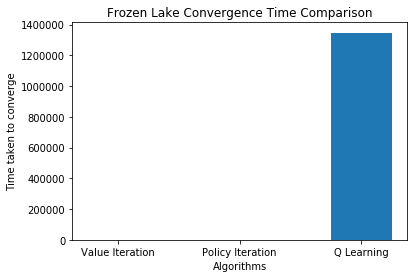

In [515]:
algos = ['Value Iteration', 'Policy Iteration', 'Q Learning']
ticks = [0, 1 , 2]
time = [df_value['Time'].mean(axis=0), df_policy['Time'].mean(axis=0) , df_qlearn['Time'].mean(axis=0)]
print("time",time)
plt.bar(ticks, height=time, width=0.5)
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Time taken to converge')
plt.title('Frozen Lake Convergence Time Comparison')
plt.savefig("Frozen_Lake/time_comparison.png")
plt.show()
plt.close()

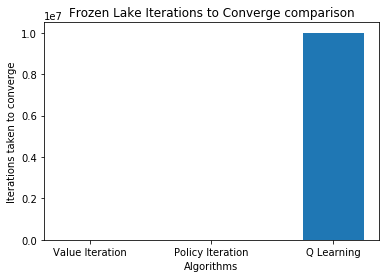

In [516]:
iters = [df_value['Iterations'].mean(axis=0), df_policy['Iterations'].mean(axis=0), df_qlearn['Iterations'].mean(axis=0)]
plt.bar(ticks, height=iters, width=0.5)
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Iterations taken to converge')
plt.title('Frozen Lake Iterations to Converge comparison')
plt.savefig("Frozen_Lake/iter_comparison.png")
plt.show()
plt.close()